In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler


In [2]:
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset.drop('name', axis=1, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
outliers_indexes = []
target = 'selling_price'

for col in dataset.select_dtypes(include='object').columns:
    for cat in dataset[col].unique():
        dataset1 = dataset[dataset[col] == cat]
        q1 = dataset1[target].quantile(0.25)
        q3 = dataset1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = dataset1[(dataset1[target] < minimum) | (dataset1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in dataset.select_dtypes(exclude='object').columns:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = dataset[(dataset[col] < minimum) | (dataset[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

288 outliers were identified, whose indices are:

[1024, 1026, 1031, 1033, 12, 525, 527, 1040, 1041, 1042, 534, 536, 537, 25, 538, 539, 29, 27, 30, 544, 33, 1057, 35, 1060, 548, 550, 551, 40, 1065, 553, 554, 555, 39, 43, 44, 1579, 563, 1075, 1077, 1078, 1591, 1080, 1081, 566, 572, 573, 574, 61, 1088, 1598, 69, 582, 70, 585, 1101, 591, 592, 593, 1107, 1619, 1623, 88, 89, 1626, 601, 1115, 1113, 94, 1116, 96, 604, 610, 611, 1636, 101, 102, 103, 612, 105, 1126, 1129, 620, 1646, 623, 1652, 631, 1659, 128, 129, 644, 1156, 1669, 1668, 1673, 137, 1674, 141, 656, 1169, 660, 149, 662, 1688, 665, 1184, 32, 163, 1699, 1050, 1703, 1705, 1560, 543, 1711, 1202, 1053, 692, 36, 1719, 187, 1723, 1214, 191, 1217, 197, 1733, 712, 204, 721, 213, 729, 218, 731, 1243, 225, 738, 227, 1253, 1572, 744, 234, 747, 236, 1775, 1777, 1778, 1780, 757, 1281, 770, 1795, 1282, 771, 1798, 263, 1288, 1797, 1290, 259, 264, 1284, 269, 1299, 1303, 796, 1311, 1823, 289, 1825, 291, 1313, 1829, 1830, 1834, 1835, 1836, 1325, 133

In [4]:
# Outliers Labeling
df1 = dataset.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'
# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['km_driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'
removing_indexes = list(set(removing_indexes))
removing_indexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [5]:
df1 = dataset.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [6]:
dataset.isnull().sum()  # no missing val

year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.pipeline import make_pipeline
ct = ColumnTransformer(
    transformers=[
        ('encoder_3', OneHotEncoder(), [2]),
        ('encoder_5', OneHotEncoder(), [3]),
        ('encoder_6', OneHotEncoder(), [4]),
        ('encoder_7', OneHotEncoder(), [5]),
    ],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
scaler = StandardScaler()
# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (1612, 16)
X_test shape:  (404, 16)
y_train shape:  (1612,)
y_test shape:  (404,)


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
#print(y_pred)
#print(y_pred.reshape(len(y_pred),1))
#print(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(regressor.score(X_test,y_test))

[[  55557.94  125000.  ]
 [  55813.94  110000.  ]
 [ 114949.94  250000.  ]
 [1711109.94 1485000.  ]
 [ 315397.94  111000.  ]
 [-135930.06  160000.  ]
 [  82949.94  130000.  ]
 [1739781.94 2100000.  ]
 [1504261.94  420000.  ]
 [1442821.94  450000.  ]
 [ 120325.94  120000.  ]
 [ 393989.94  380000.  ]
 [ 590341.94  385000.  ]
 [1801221.94 1600000.  ]
 [ 581893.94  325000.  ]
 [ 228613.94  260000.  ]
 [ 717317.94  695000.  ]
 [ 160261.94  315000.  ]
 [1891333.94 3800000.  ]
 [-115450.06   90000.  ]
 [ 535557.94  370000.  ]
 [1459205.94 4000000.  ]
 [ 507653.94  470000.  ]
 [ 762117.94  640000.  ]
 [ -78586.06  130000.  ]
 [ -70650.06   80000.  ]
 [ 814853.94  755000.  ]
 [ 506117.94  287000.  ]
 [ 214021.94  120000.  ]
 [1758213.94  750000.  ]
 [ -33274.06  140000.  ]
 [1039365.94  130000.  ]
 [ -80378.06   80000.  ]
 [ 561413.94  600000.  ]
 [ 502021.94  550000.  ]
 [ 832005.94  950000.  ]
 [ 450565.94  450000.  ]
 [ 383749.94  225000.  ]
 [   8965.94  110000.  ]
 [1590277.94 2500000.  ]


In [14]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5270132303097386


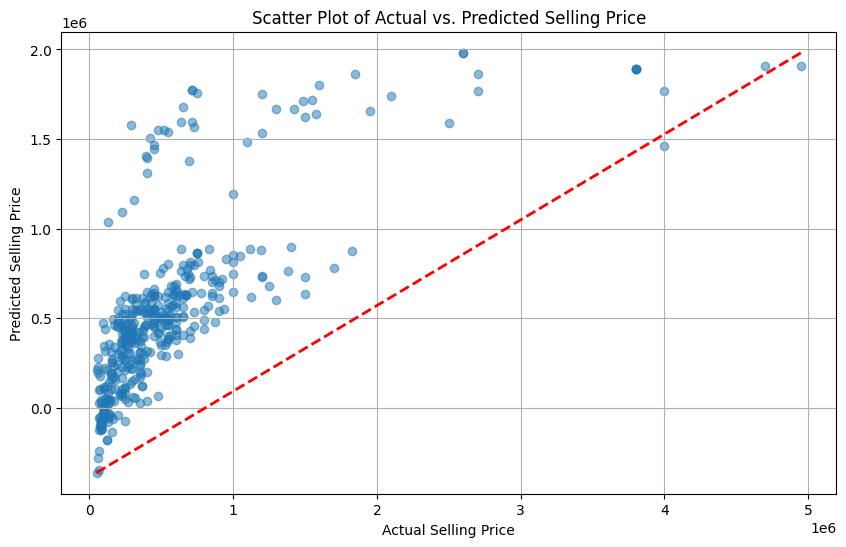

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Scatter Plot of Actual vs. Predicted Selling Price")
plt.grid()
plt.show()

In [16]:
# Model training using cross-validation
from sklearn.model_selection import cross_val_score, KFold
regressor =LinearRegression()
# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(regressor, X, y, cv=kf, scoring='r2')  # You can change the number of folds (cv) as needed

print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Mean R2 Score: {np.mean(cv_scores)}')

Cross-Validation R2 Scores: [0.5  0.51 0.56 0.46 0.47]
Mean R2 Score: 0.5002265452611249


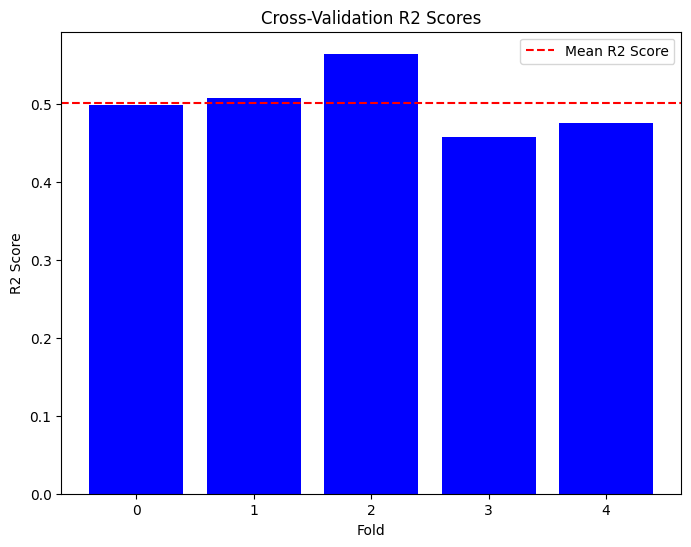

In [18]:
# Plotting individual R2 scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, color='blue')
plt.axhline(y=np.mean(cv_scores), color='red', linestyle='--', label='Mean R2 Score')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('Cross-Validation R2 Scores')
plt.legend()
plt.show()

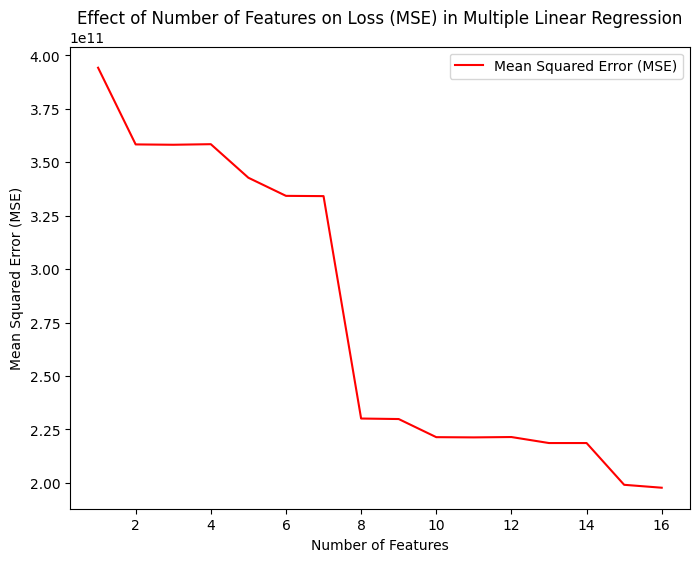

In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are defined as in your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a range of values to explore for a hyperparameter (e.g., number of features)
param_values = np.arange(1, X.shape[1] + 1)  # Assuming X has more than one feature

# Lists to store loss values
mse_values = []

for num_features in param_values:
    # Select the first num_features features
    X_subset = X[:, :num_features]

    # Create and train Linear Regression model
    regressor = LinearRegression()
    mse = -cross_val_score(regressor, X_subset, y, cv=kf, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(param_values, mse_values, label='Mean Squared Error (MSE)', color='red')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Number of Features on Loss (MSE) in Multiple Linear Regression')
plt.legend()
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (n_neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
# You can adjust the number of neighbors as needed

# Fit the model to your training data
knn_regressor.fit(X_train, y_train)

# Make predictions on new data
predictions = knn_regressor.predict(X_test)

In [21]:
print(knn_regressor.score(X_test,y_test))

0.4360996003404721


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Root Mean Squared Error (RMSE): 495774.558775193
Mean Absolute Error (MAE): 255107.93712871286


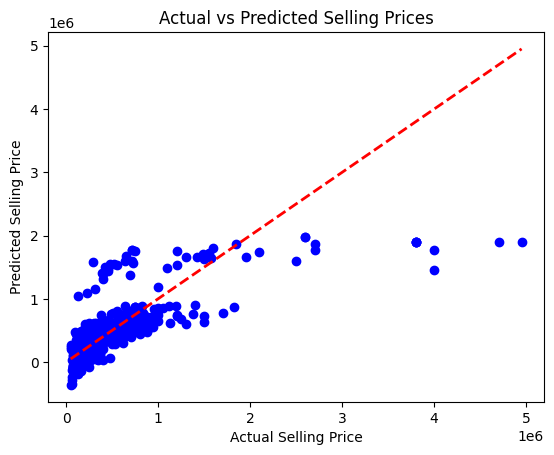

In [23]:
import matplotlib.pyplot as plt

# Plot actual vs predicted selling prices
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()


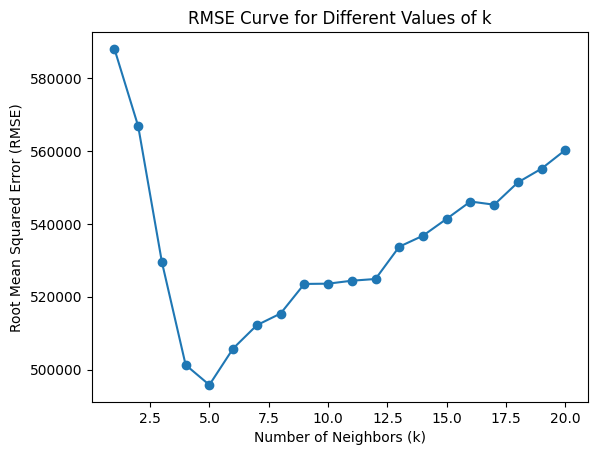

In [24]:
# In regression problems, we typically use metrics like Root Mean Squared Error 
# (RMSE) or Mean Absolute Error (MAE) rather than accuracy. Accuracy is commonly 
# used in classification problems. However, you can still create a curve to visualize 
# how the model's performance changes with different values of k (number of neighbors).



import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Vary the value of k
k_values = range(1, 21)
rmse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Plot the RMSE curve
plt.plot(k_values, rmse_values, marker='o')
plt.title('RMSE Curve for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()
